## 시간대별 데이터 시각화
- 티머니 홈페이지 > 대중교통 통계자료 > 지하철 시간대별 이용현황 ( , 제거)

In [ ]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
for row in data:
    row[4:] = map(int, row[4:])  # 숫자로 변경하여 저장
    print(row)

### 7시 승차 인원 그래프

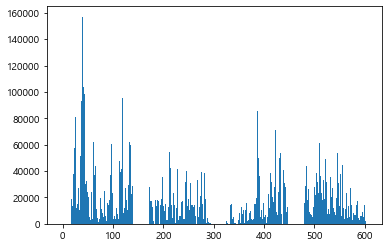

In [16]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []
for row in data:
    result.append(int(row[10]))

# 시각화 그래프
import matplotlib.pyplot as plt
plt.bar(range(len(result)), result)  # 가로축(range 사용), 세로축(리스트)
plt.show()

### 오름차순 정렬

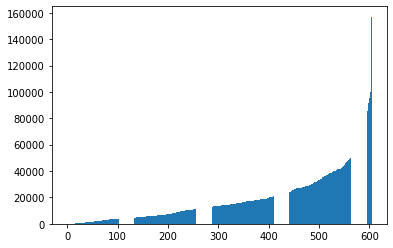

In [4]:
result.sort()
plt.bar(range(len(result)), result)
plt.show()

### 7 ~ 9시 승차 인원

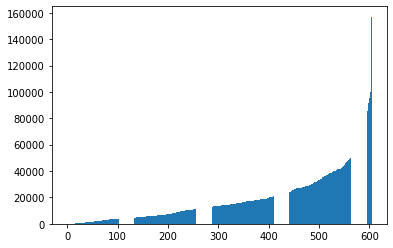

In [6]:
for row in data:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))
    
result.sort()
plt.bar(range(len(result)), result)
plt.show()

### 3시간 동안 최댓값 역 찾기
- 7시부터 9시까지 가장 많이 타는 역

In [10]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

maxi = 0
station = ''
for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > maxi:
        maxi = sum(row[10:15:2])
        station = row[3] + '(' + row[1] + ')'
print(station, maxi)  

신림(2호선) 544943


- 7시부터 9시까지 가장 많이 내리는 역

In [12]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

maxi = 0
station = ''
for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[11:16:2]) > maxi:
        maxi = sum(row[10:15:2])
        station = row[3] + '(' + row[1] + ')'
print(station, maxi)  

중앙보훈병원(9호선2~3단계) 69978


### 밤 11시 사람들이 가장 많이 타는 역

In [5]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

maxi = 0
station = ''
for row in data:
    if maxi < int(row[41]):
        maxi = int(row[41])
        station = row[3] + '(' + row[1] + ')'
print(station, maxi)

신림(2호선) 91172


### 시간대별 최대 승차 인원

In [12]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

maxi = [0] * 24
station = [''] * 24
for row in data:
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2 + 4]
        if a > maxi[j]:
            maxi[j] = a
            station[j] = row[3] + str(j+4)+'시'
print(station, maxi)

['구로4시', '신림5시', '신림6시', '신림7시', '신림8시', '신림9시', '신림10시', '신림11시', '신림12시', '강남13시', '강남14시', '강남15시', '강남16시', '강남17시', '강남18시', '강남19시', '강남20시', '강남21시', '강남22시', '강남23시', '부평24시', '창동25시', '동묘앞26시', ''] [7057, 30145, 58174, 156999, 243617, 144327, 76795, 65962, 69564, 82744, 90866, 115646, 131954, 189404, 274814, 177704, 154124, 199525, 109998, 15127, 577, 10, 3, 0]


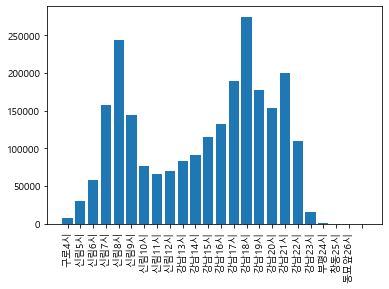

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(24), maxi)
plt.xticks(range(24), station, rotation=90)  # 축 축 범위가 아닌 역 이름으로 표시
plt.show()

### 시간대별 승하차 인원 추이

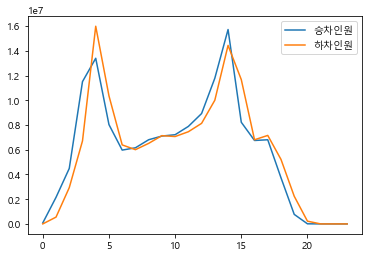

In [15]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

# 승하차 인원 따로
in_train = [0] * 24
out_train = [0] * 24

for row in data: 
    row[4:] = map(int, row[4:])
    for i in range(24):
        in_train[i] += row[i*2 + 4]
        out_train[i] += row[i*2 + 5]

# 꺽은선 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(in_train, label='승차인원')
plt.plot(out_train, label='하차인원')
plt.legend()
plt.show()